# **Linear Regression with scikit-learn - a simple Introduction**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [4]:
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [5]:
df = pd.DataFrame(data = {"revenue": revenue, "budget": budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


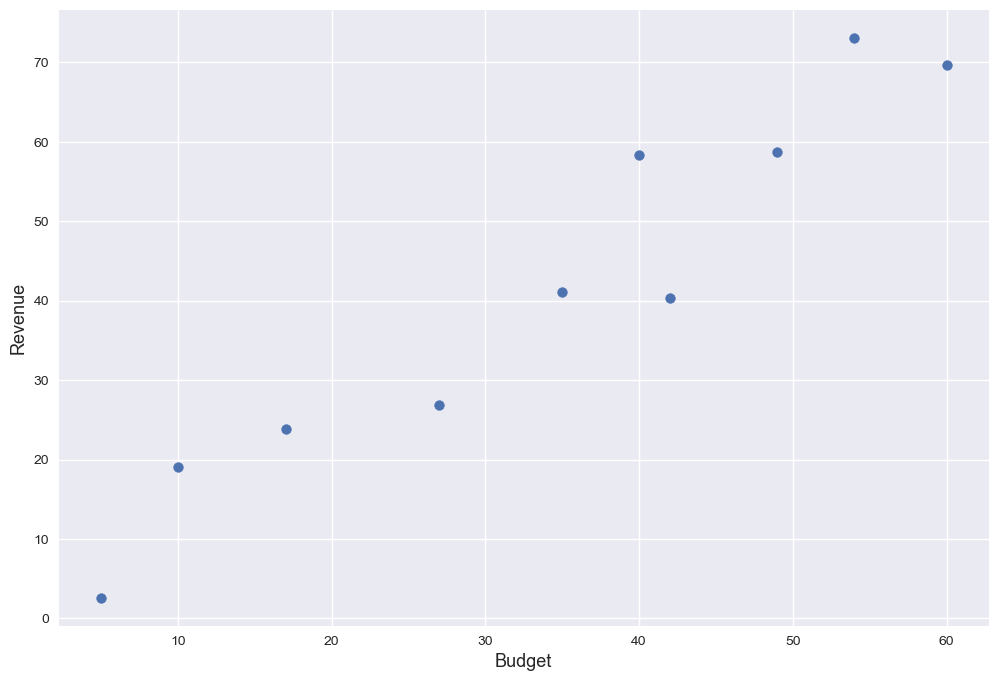

In [6]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)    # scatter: 산점도
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

# **Linear Relationship between Budget and Revenue**

![Linear Relationship between Budget and Revenue](./png/linear_regression.png)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression(fit_intercept = True)

In [9]:
lm.fit(X = df.budget.to_frame(), y = df.revenue)    # fitting the model (Regression Line)

LinearRegression()

In [10]:
slope = lm.coef_    # slope of Regression Line
slope

array([1.19897684])

In [11]:
intercept = lm.intercept_    # intercept of Regression Line
intercept

0.7046849757673783

In [12]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [13]:
x_lin = np.array([0, 100])
y_lin = slope * x_lin + intercept

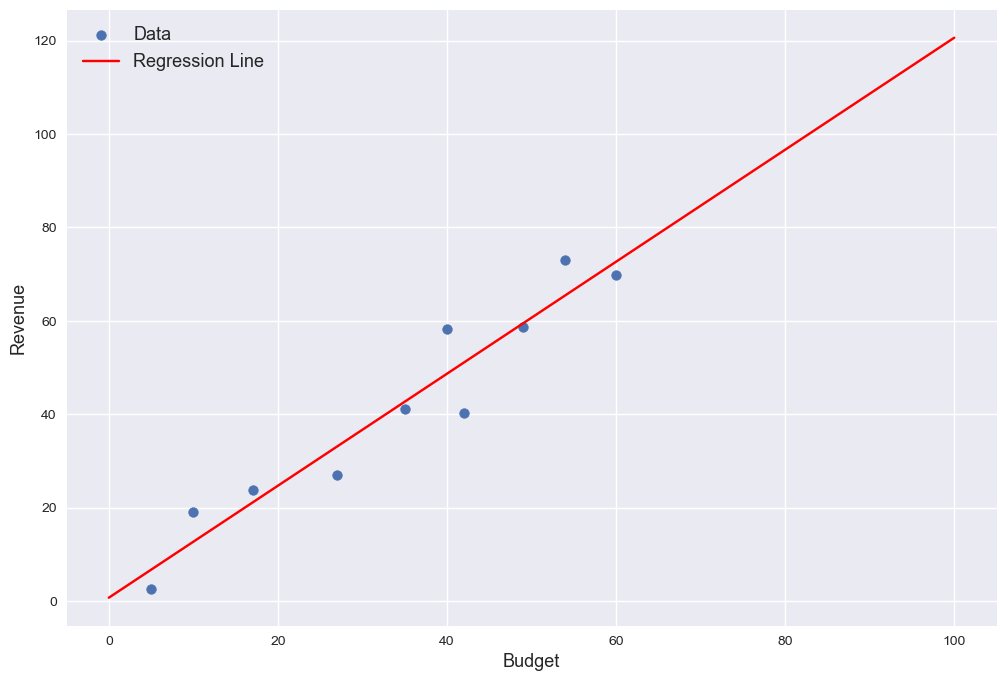

In [14]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# **Making Predictions with Linear Regression**

##### **new movies (observations/data points)**

In [15]:
budget_new = np.array([63, 66, 74, 80, 85])

In [16]:
revenue_new = np.array([74.2, 80.7, 98.2, 94.8, 101.7])

In [17]:
df_new = pd.DataFrame(data = {"revenue": revenue_new, "budget": budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [18]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


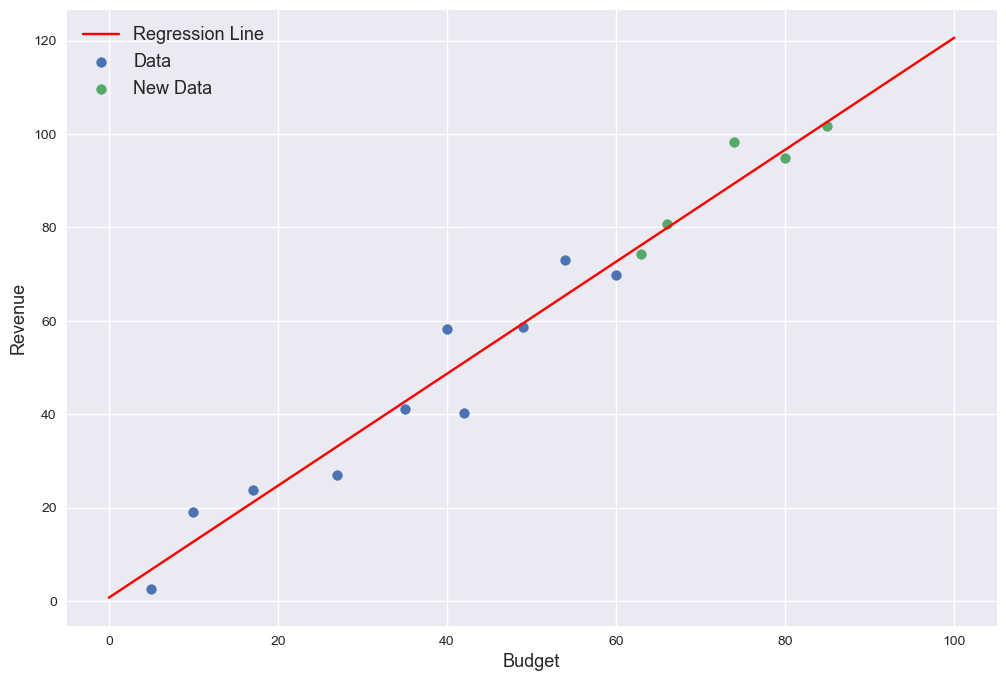

In [19]:
plt.figure(figsize = (12, 8))
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# **Overfitting**

##### **Overfitting**: Model performs well on the original (training) dataset, but it does generalize well to new data (test set). Overfitting happens when the **model is too complex** (too many parameters) and detects subtle patterns (noise) in the training set.

##### Example: **Polynomial Model** with defree = 9 (perfect fit)

![name](./png/overfitting.png)

In [20]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9)    # polynomial regression (deg = 9)
poly_m

array([ 2.31988762e-09, -6.91663857e-07,  8.80409588e-05, -6.24271102e-03,
        2.69731803e-01, -7.29512946e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [21]:
x_poly = np.linspace(0, 100, 1000)    # x values for polynomial regression line/curve

In [22]:
y_poly = np.polyval(poly_m, x_poly)    # y values for polynomial regression line/curve
y_poly

array([-1.21710591e+04, -1.15690657e+04, -1.09903412e+04, -1.04341773e+04,
       -9.89988279e+03, -9.38678301e+03, -8.89421961e+03, -8.42155026e+03,
       -7.96814834e+03, -7.53340264e+03, -7.11671705e+03, -6.71751032e+03,
       -6.33521571e+03, -5.96928078e+03, -5.61916706e+03, -5.28434978e+03,
       -4.96431765e+03, -4.65857256e+03, -4.36662929e+03, -4.08801532e+03,
       -3.82227054e+03, -3.56894699e+03, -3.32760865e+03, -3.09783115e+03,
       -2.87920159e+03, -2.67131826e+03, -2.47379043e+03, -2.28623811e+03,
       -2.10829184e+03, -1.93959247e+03, -1.77979092e+03, -1.62854801e+03,
       -1.48553419e+03, -1.35042938e+03, -1.22292277e+03, -1.10271259e+03,
       -9.89505902e+02, -8.83018465e+02, -7.82974489e+02, -6.89106469e+02,
       -6.01155000e+02, -5.18868589e+02, -4.42003484e+02, -3.70323492e+02,
       -3.03599809e+02, -2.41610849e+02, -1.84142076e+02, -1.30985844e+02,
       -8.19412296e+01, -3.68138767e+01,  4.58416040e+00,  4.24345704e+01,
        7.69129358e+01,  

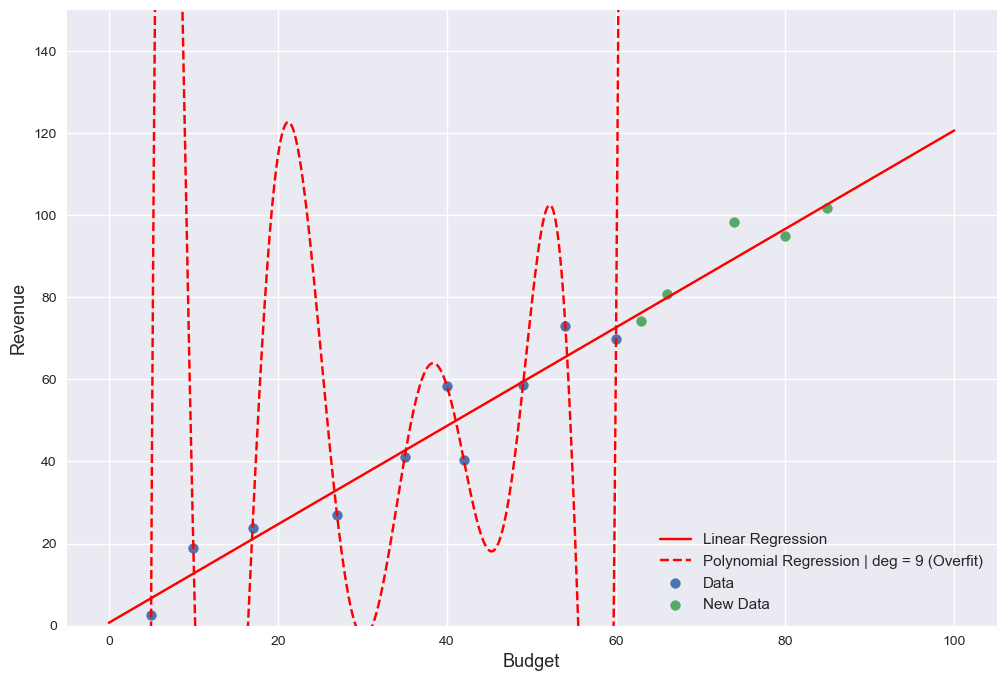

In [23]:
plt.figure(figsize = (12, 8))
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)", linestyle = "--", color = "red")
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

##### **Solutions** to overcome overfitting:
- use a **simpler model** with fewer parameters (linear rather than polynomial)
- more and better data (remove outliers & errors)
- Constrain the model -> make the model more simple with **Regularization**

# **Underfitting**

##### **Underfitting**: Model performs neither well on the original (training) dataset, nor does it generalize well to new data (test set). Underfitting happens when the **model is too simple** to learn the underlying structure of the data.

##### most simple (linear) model with only one parameter: **y = a**
- intercept == a (e.g. the mean)
- slope == 0

In [24]:
mean = df.revenue.mean()
mean

41.35000000000001

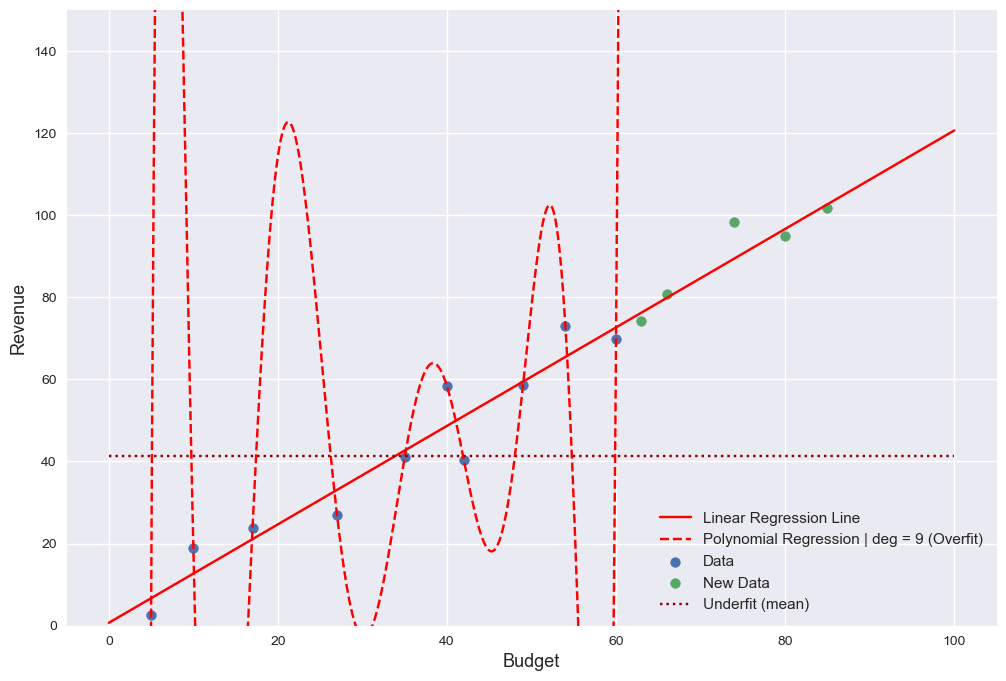

In [25]:
plt.figure(figsize = (12, 8))
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)", linestyle = "--", color = "red")
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = ":", color = "darkred", label = "Underfit (mean)")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

##### **Solutions** to overcome underfitting:
- use a **more powerful model** with more parameters
- add more / better features (independent variables) to the algorithm -> Feature Engineering
- Reduce the constraints of the model -> make it more complex with Less Regularization

# **Logisitc Regression with scikit-learn - a simple Introduction (Part 1)**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [27]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [28]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

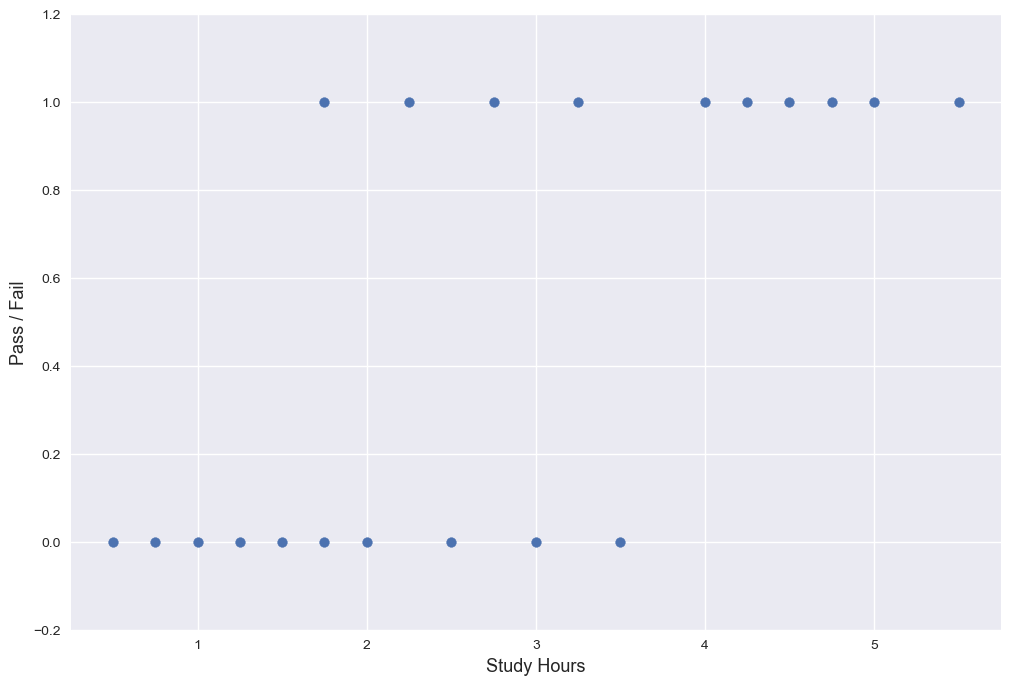

In [29]:
plt.figure(figsize = (12, 8))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 13)
plt.ylabel("Pass / Fail", fontsize = 13)
plt.ylim(-0.2, 1.2)
plt.show()

In [30]:
data = pd.DataFrame({"hours": hours, "success": success})
data.head()

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression(fit_intercept = True)

In [33]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [34]:
lm.coef_

array([0.23459561])

In [35]:
lm.intercept_

-0.1539352689884873

In [36]:
data["pred"] = lm.predict(data.hours.to_frame())
data.head()

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958


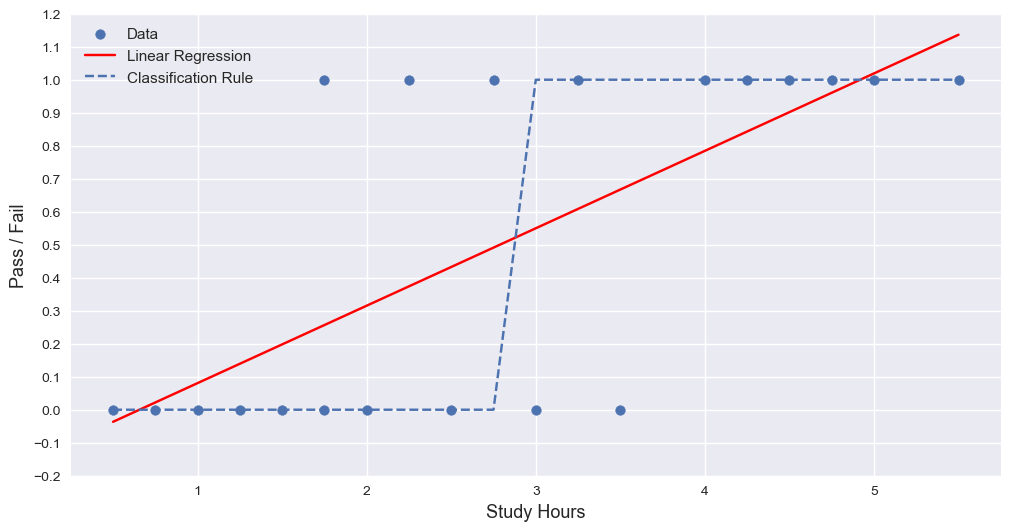

In [37]:
plt.figure(figsize = (12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")

plt.xlabel("Study Hours", fontsize = 13)
plt.ylabel("Pass / Fail", fontsize = 13)
plt.legend(fontsize = 11, loc = 2)

plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)

plt.show()

# **Logisitc Regression with scikit-learn - a simple Introduction (Part 2)**

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lm = LogisticRegression()

In [40]:
lm.fit(data.hours.to_frame(), data.success)

LogisticRegression()

In [41]:
data["pred"] = lm.predict(data.hours.to_frame())
data.head()

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0


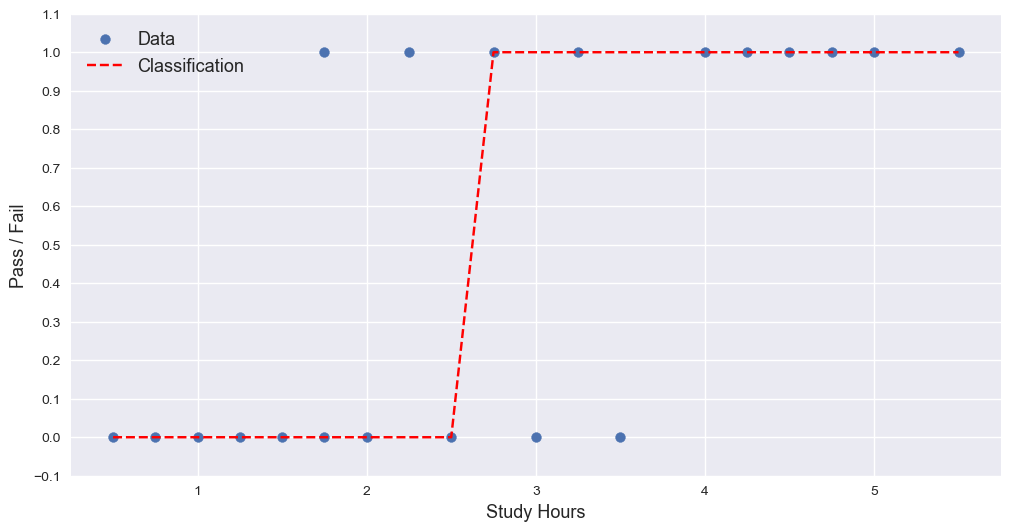

In [42]:
plt.figure(figsize = (12, 6))
plt.scatter(data.hours, data.success, s = 50, label = "Data")
plt.plot(data.hours, data.pred, color = "red", linestyle = "--", label = "Classification")

plt.xlabel("Study Hours", fontsize = 13)
plt.ylabel("Pass / Fail", fontsize = 13)
plt.legend(fontsize = 13, loc = 2)

plt.yticks(np.arange(-10, 10, 0.1))
plt.ylim(-0.1, 1.1)
plt.show()

In [43]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

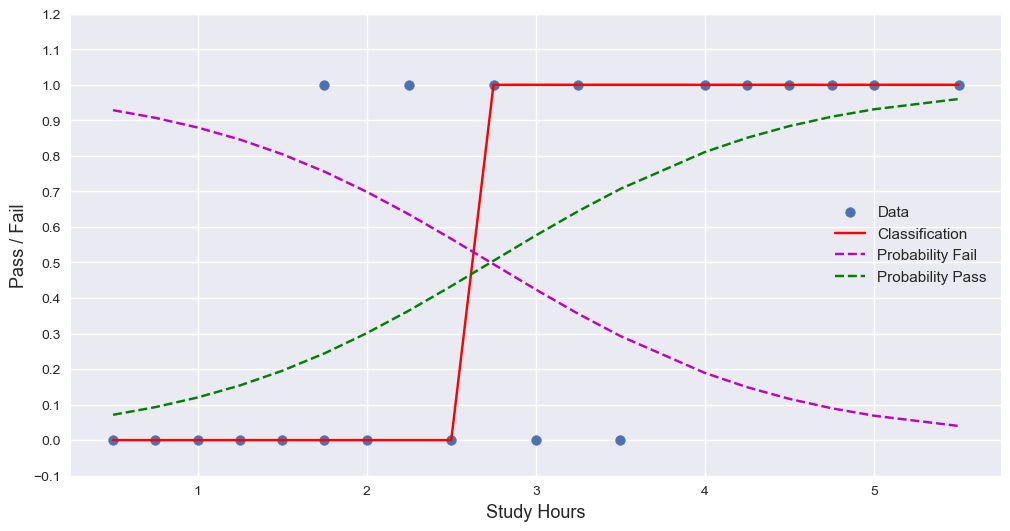

In [44]:
plt.figure(figsize = (12, 6))
plt.scatter(data.hours, data.success, s = 50, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")

plt.xlabel("Study Hours", fontsize = 13)
plt.ylabel("Pass / Fail", fontsize = 13)
plt.legend(fontsize = 11)

plt.yticks(np.arange(-1, 2, 0.1))
plt.ylim(-0.1, 1.2)
plt.show()